## Notebook to broswe the detected eQTL result for items of interest

#### import libraries and set notebook variables

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# parameters
cohort = 'foundin'
day = 'da65'
cell_type = 'DopaminergicNeurons'

In [8]:
# naming
cohort_build = f'{cohort}.{day}'
geno_version = 'amppdv1'
cohort_version = f'{cohort}.{geno_version}'

# directories
wrk_dir = f'/home/jupyter/{cohort}/eqtl'
expr_dir = f'{wrk_dir}/expression'
genos_dir = f'{wrk_dir}/genotypes'
info_dir = f'{wrk_dir}/sample_info'
tensorqtl_dir = f'{wrk_dir}/tensorqtl'
results_dir = f'{wrk_dir}/results'
gwas_dir = f'{wrk_dir}/gwas'

# input files
gencode_pkl = f'{expr_dir}/gencode_v29.lncipedia_v5_2_hc.annotation.pkl'

# output files
eqtl_psam = f'{info_dir}/{cohort_build}.psam'

# constant values
autosomes = [str(x) for x in list(range(1,23))]
max_dist = 1000000
max_threads = 24
alpha_value = 0.05

# items of interest
genes = ['SNCA', 'LRRK2', 'GBA', 'CHURC1']
# meta5_cojo_file = f'{gwas_dir}/pd_meta5v2_cojo_results.jma.cojo.csv'
meta5_st2_clean_file = f'{gwas_dir}/pd.table_s2.clean.txt'
meta5_stats_file = f'{gwas_dir}/pdmeta_sumstats_hg38.h5'

#### load the gencode annotations

In [9]:
%%time
gencode_df = pd.read_pickle(gencode_pkl)
print(gencode_df.shape)
# chr_lengths_df = pd.read_csv(genome_index_file, header=None, sep='\t')
# print(chr_lengths_df.shape)

(3072652, 50)
CPU times: user 8.04 s, sys: 3.63 s, total: 11.7 s
Wall time: 11.7 s


#### load the detected eQTL

In [10]:
this_file = f'{results_dir}/{cohort_build}.{cell_type}.cis_qtl_top_assoc.txt.gz'
eqtl_df = pd.read_csv(this_file)
print(eqtl_df.shape)
number_genes = len(eqtl_df['phenotype_id'].unique())
print(f'detected eqtl for {number_genes} genes')
eqtl_df.head()

(2314, 19)
detected eqtl for 2314 genes


,Unnamed: 0,phenotype_id,variant_id,tss_distance,maf,ma_samples,ma_count,pval_g,b_g,b_g_se,pval_i,b_i,b_i_se,pval_gi,b_gi,b_gi_se,tests_emt,pval_emt,pval_adj_bh
0,5,ENSG00000157911.10,rs12745331,676649,0.126374,22,23,2.869690e-07,2.39065,0.429677,0.647128,-0.230833,0.502522,5.751060e-07,-7.02835,1.301960,2874,0.001653,0.030042
1,13,ENSG00000118729.11,rs77065360,497687,0.054945,10,10,3.501250e-03,1.44769,0.482258,0.000274,1.959550,0.516620,1.330010e-06,-6.70948,1.291370,2474,0.003290,0.046551
2,38,ENSG00000241563.3,rs4443893,-395647,0.060440,11,11,1.488560e-05,-2.22146,0.484093,0.943851,-0.037495,0.530830,1.910460e-06,6.46808,1.266530,1836,0.003508,0.048752
3,58,ENSG00000070831.15,rs10917119,-30711,0.137363,24,25,1.446080e-05,-1.45170,0.315831,0.468417,0.398855,0.547691,2.096340e-07,5.00853,0.888362,3210,0.000673,0.017336
4,80,ENSG00000158195.10,rs141568912,-828283,0.054945,10,10,1.505600e-03,1.82290,0.556174,0.074414,-0.875992,0.485110,1.916820e-06,-6.71150,1.314400,1433,0.002747,0.041572


#### grab the max pval_nominal and max pval_beta

In [11]:
max_pvalue = eqtl_df['pval_gi'].max()
max_pval_emt = eqtl_df['pval_emt'].max()
print(f'max p-value: {max_pvalue} and p-values(beta): {max_pval_emt}')
mean_emt = eqtl_df['tests_emt'].mean()
mean_pval_emt = 0.05/mean_emt
print(f'mean emt {mean_emt}, so mean pval_emt: {mean_pval_emt}')

max p-value: 7.4982e-06 and p-values(beta): 0.0036519
mean emt 2910.479688850475, so mean pval_emt: 1.71792987223175e-05


In [12]:
genes_oi_df = gencode_df.loc[gencode_df['gene_name'].isin(genes)]
print(genes_oi_df.shape)
gene_ids = genes_oi_df['gene_id'].unique()
print(gene_ids)
gene_names = genes_oi_df['gene_name'].unique()
print(gene_names)
genes_oi_df.head()

(784, 50)
['ENSG00000188906.15' 'ENSG00000258289.8' 'ENSG00000177628.15'
 'ENSG00000145335.15']
['LRRK2' 'CHURC1' 'GBA' 'SNCA']


,seqname,source,feature,start,end,score,strand,frame,ID,ccdsid,...,transcript_alias_4,transcript_alias_5,transcript_alias_6,transcript_alias_7,transcript_alias_8,transcript_alias_9,transcript_id,transcript_name,transcript_support_level,transcript_type
325235,chr12,HAVANA,CDS,40225132,40225282,.,+,0,NaN,CCDS31774.1,...,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000298910.11,LRRK2-201,1,protein_coding
325236,chr12,HAVANA,CDS,40225132,40225282,.,+,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000343742.6,LRRK2-202,5,protein_coding
325237,chr12,HAVANA,CDS,40225188,40225282,.,+,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000644108.1,LRRK2-209,NaN,nonsense_mediated_decay
325238,chr12,HAVANA,CDS,40225555,40225640,.,+,2,NaN,CCDS31774.1,...,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000298910.11,LRRK2-201,1,protein_coding
325239,chr12,HAVANA,CDS,40225555,40225640,.,+,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000343742.6,LRRK2-202,5,protein_coding


In [13]:
eqtl_genes_oi_df = eqtl_df.loc[eqtl_df['phenotype_id'].isin(genes_oi_df['gene_id'])]
print(eqtl_genes_oi_df.shape)
print(eqtl_genes_oi_df['phenotype_id'].unique())
print(genes_oi_df.loc[genes_oi_df['gene_id'].isin(eqtl_genes_oi_df['phenotype_id']), 
                      ['gene_name']]['gene_name'].unique())

(1, 19)
['ENSG00000145335.15']
['SNCA']


#### load the variants of interest

In [14]:
variants_oi_df = pd.read_csv(meta5_st2_clean_file, sep='\t')
print(variants_oi_df.shape)
variants_oi_df.head()

(91, 12)


,SNP,CHR,BP,Nearest_Gene,QTL_Nominated_Gene,Effect_allele,Other_allele,EAF,Beta_all_studies,SE_all_studies,P_all_studies,P_COJO_all_studies
0,rs114138760,1,154898185,PMVK,NaN,c,g,0.0112,0.2812,0.0478,4.190000e-09,1.090000e-08
1,rs35749011,1,155135036,KRTCAP2,EFNA3,a,g,0.0169,0.6068,0.0342,1.720000e-70,3.820000e-77
2,rs76763715,1,155205634,GBAP1,NaN,t,c,0.9953,-0.7467,0.0765,1.590000e-22,9.900000e-23
3,rs6658353,1,161469054,FCGR2A,FCGR2A,c,g,0.5011,0.0650,0.0094,6.100000e-12,4.690000e-12
4,rs11578699,1,171719769,VAMP4,VAMP4,t,c,0.1949,-0.0704,0.0120,4.470000e-09,4.450000e-09


#### load the full gwas summary stats

In [17]:
%%time
gwas_stats_df = pd.read_hdf(meta5_stats_file)
print(gwas_stats_df.shape)
display(gwas_stats_df.sample(5))

(7769022, 11)


,SNP,A1,A2,freq,b,se,p,N,chr,position,id
5698606,rs77328189,T,C,0.0234,0.0810,0.0476,0.08868,1351069,chr5,15437003,rs77328189
6497323,rs72900821,C,G,0.1362,0.0124,0.0146,0.39540,1460059,chr6,84461972,rs72900821
4994499,rs13121334,A,G,0.6632,-0.0019,0.0106,0.86150,1460059,chr4,111880709,rs13121334
1713083,rs3863393,A,G,0.8439,0.0014,0.0148,0.92430,1460059,chr15,24906009,rs3863393
449230,rs17120111,T,C,0.1455,0.0246,0.0135,0.06888,1474097,chr11,116873302,rs17120111


CPU times: user 26.3 s, sys: 2.42 s, total: 28.7 s
Wall time: 29.5 s


#### see if any of the independent significant results happen to be risk independent variants

In [18]:
def check_eqtls_for_variants(eqtl_df, variants_df, gencode_df):
    eqtl_variants_oi_df = eqtl_df.loc[eqtl_df['variant_id'].isin(variants_df['SNP'])]
    print(eqtl_variants_oi_df.shape)
    this_cnt = len(eqtl_variants_oi_df['variant_id'].unique())
    print(f'variants {this_cnt}')
    print(eqtl_variants_oi_df['variant_id'].unique())
    this_cnt = len(eqtl_variants_oi_df['phenotype_id'].unique())
    print(f'genes {this_cnt}')
    oi_genes = gencode_df.loc[gencode_df['gene_id'].isin(eqtl_variants_oi_df['phenotype_id']), 
                              ['gene_name']]['gene_name'].unique()
    print(oi_genes)
    return oi_genes

In [19]:
check_eqtls_for_variants(eqtl_df, variants_oi_df, gencode_df)

(0, 19)
variants 0
[]
genes 0
[]


array([], dtype=object)

#### now load rest of results and see if risk index variants are eQTL

In [20]:
for chrom in autosomes:
    print(f'checking chromosome {chrom}')
    chrom_eqtl_df = pd.read_parquet(f'{tensorqtl_dir}/{cohort_build}.{cell_type}\
.cis_qtl_pairs.chr{chrom}.parquet')
#     oi_chrom_eqtl_df = chrom_eqtl_df.loc[chrom_eqtl_df['pval_gi'] < max_pvalue]
    oi_chrom_eqtl_df = chrom_eqtl_df.loc[chrom_eqtl_df['pval_gi'] < mean_pval_emt]
    these_genes = check_eqtls_for_variants(oi_chrom_eqtl_df, variants_oi_df, gencode_df)
    if len(these_genes) > 0:
        genes = set(genes) | set(these_genes)
    
print(genes)    

checking chromosome 1
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 2
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 3
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 4
(1, 15)
variants 1
['rs873786']
genes 1
['DGKQ']
checking chromosome 5
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 6
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 7
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 8
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 9
(1, 15)
variants 1
['rs6476434']
genes 1
['PHF24']
checking chromosome 10
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 11
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 12
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 13
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 14
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 15
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 16
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 17
(0, 15)
variants 0
[]
genes 0
[]
checking chromosome 18


#### check all the genes of interest regardless of detectable eQTL

In [49]:
#plot local manhattan for gene eQTL
def plot_eqtl_manhattan(gene_id, gene_name, gene_chrom, gene_start, gene_stop, 
                        eqtl_df, gwas_df):
    print(f'{gene_name} {gene_id}')
    print(f'gene {gene_name} is on {gene_chrom} from {gene_start} to {gene_stop}')

    #pull in all results for the gene from chromosome for all visits
    gene_results_df = eqtl_df.loc[eqtl_df['phenotype_id'] == gene_id]
    print(gene_results_df.shape)

    if not gene_results_df is None and gene_results_df.shape[0] > 0:
#         #get suggestive results counts
#         temp_results_df = gene_results_df.loc[gene_results_df['bh_fdr'] <= alpha_value]
#         print(temp_results_df.shape)

        #create some cleaner data columns for plotting purposes
#         gene_results_df['log10_bh_pvalue'] = np.log10(gene_results_df['bh_fdr'])*-1
        gene_results_df['log10_pvalue'] = np.log10(gene_results_df['pval_gi'])*-1
        gene_results_df['z_score'] = gene_results_df['b_gi']/gene_results_df['b_gi_se']
        gene_results_df['z_score_abs'] = np.abs(gene_results_df['z_score'])
        gwas_df['log10_pvalue'] = np.log10(gwas_df['p'])*-1

        #now actually do the plotting
        sns.set(style='darkgrid')
#         sns.relplot(x='tss_distance',y='log10_pvalue',size='z_score_abs', \
#                     alpha=.5, palette="dark", height=12, data=gene_results_df)
        sns.relplot(x='pos',y='log10_pvalue',size='z_score_abs', 
                    alpha=.5, palette="dark", height=12, data=gene_results_df)        

        min_y = round(min(gene_results_df['log10_pvalue']))

        plt.plot([gene_start, gene_stop], [min_y, min_y], linewidth=3)
        plt.text(gene_stop+10000,min_y,gene_name,fontsize='small')
#         plt.plot([0, 0], [min_y, min_y], linewidth=3)
#         plt.text(0+10000,min_y,gene_name,fontsize='small')
        plt.scatter(x=gwas_df['position'],y=gwas_df['log10_pvalue'], 
                    color='gray', alpha=0.25)


        plt.title(f'{gene_name} eQTL',fontsize='large') 
        plt.show()

#     plot_out_file_name = f'{WRKDIR}/plink/images/{gene_name}.local_man.png'
#     plt.savefig(plot_out_file_name,format='png',dpi=600,bbox_inches='tight')
    
    return

In [46]:
genes_oi_df = gencode_df.loc[gencode_df['gene_name'].isin(genes)]
print(genes_oi_df.shape)
gene_ids = genes_oi_df['gene_id'].unique()
print(gene_ids)

(956, 50)
['ENSG00000188906.15' 'ENSG00000258289.8' 'ENSG00000177628.15'
 'ENSG00000145335.15' 'ENSG00000145214.13' 'ENSG00000122733.12']


In [47]:
gwas_stats_df.head()

,SNP,A1,A2,freq,b,se,p,N,chr,position,id
0,rs7899632,A,G,0.5665,0.0110,0.0095,0.2476,1474097,chr10,98240868,rs7899632
1,rs61875309,A,C,0.7953,-0.0091,0.0116,0.4295,1474097,chr10,98240888,rs61875309
2,rs150203744,T,C,0.0140,-0.0152,0.0649,0.8147,1351069,chr10,98242110,rs150203744
3,rs111551711,T,C,0.9868,0.0347,0.0742,0.6396,777210,chr10,98242707,rs111551711
4,rs12258651,T,G,0.8819,-0.0011,0.0149,0.9423,1474097,chr10,98243485,rs12258651


chr12
(6819715, 21)
(4078, 21)
LRRK2 ENSG00000188906.15
gene LRRK2 is on chr12 from 40196744 to 40369285
(4078, 21)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


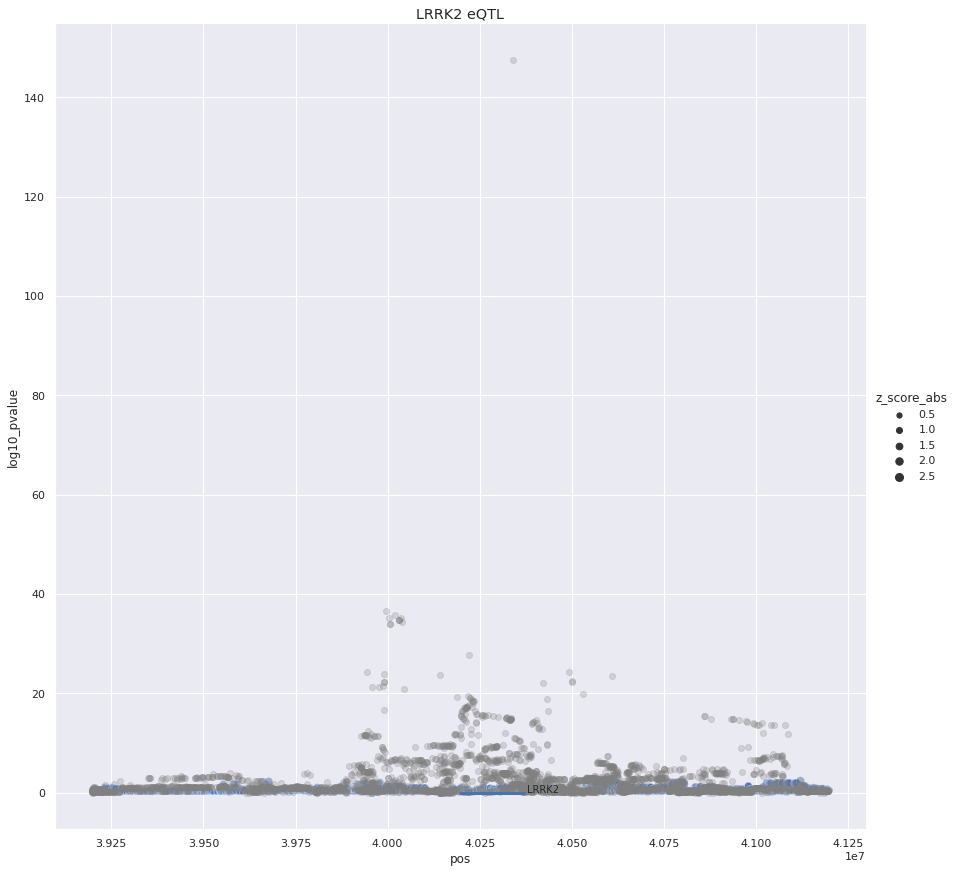

chr14
(4451605, 21)
(3603, 21)
CHURC1 ENSG00000258289.8
gene CHURC1 is on chr14 from 64914361 to 64944591
(3603, 21)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


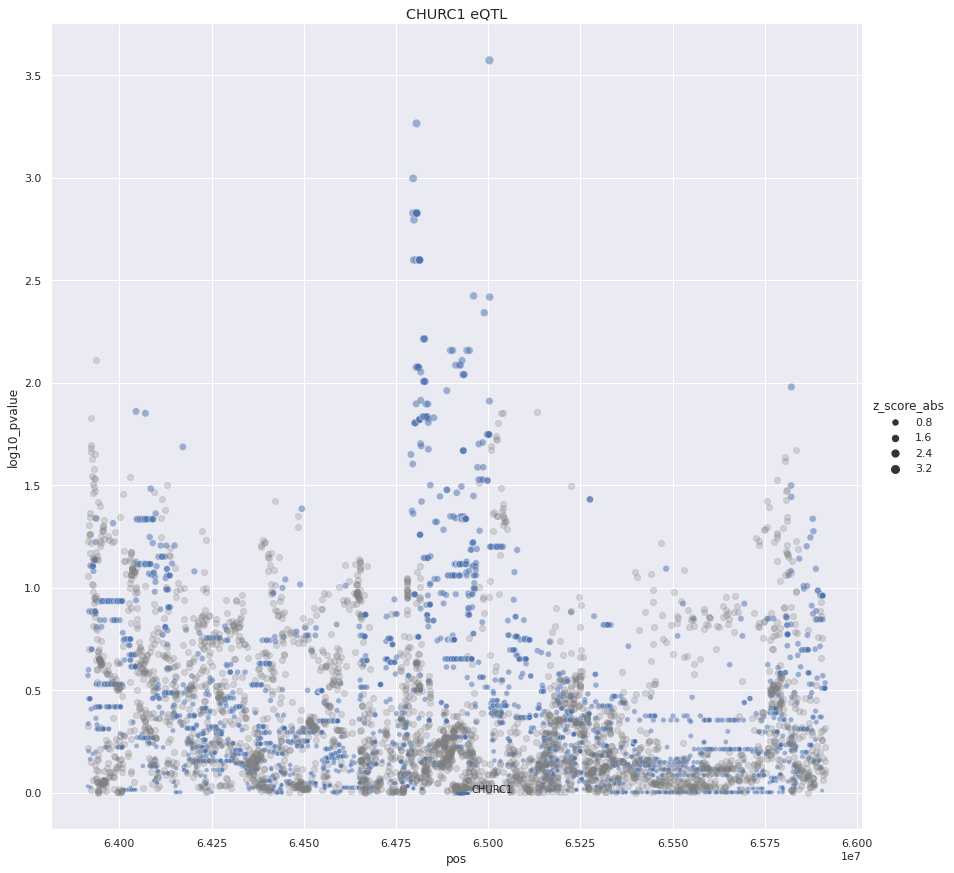

chr1
(11188963, 21)
(2397, 21)
GBA ENSG00000177628.15
gene GBA is on chr1 from 155234452 to 155244699
(2397, 21)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


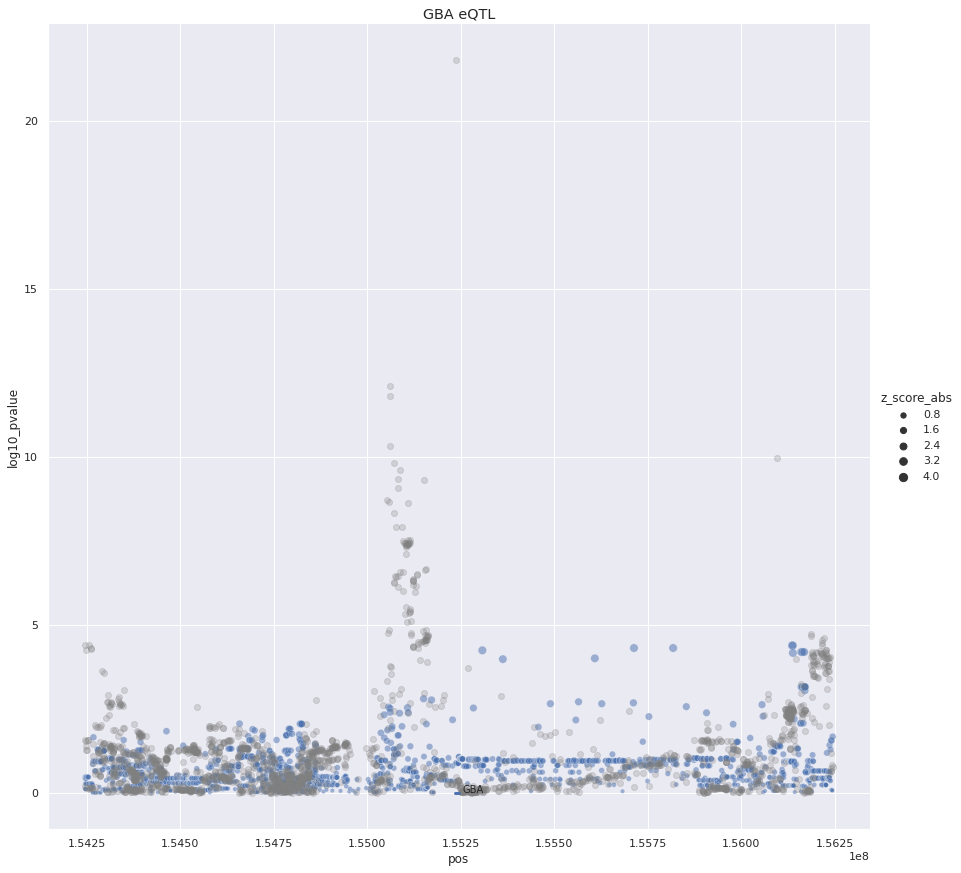

chr4
(5795553, 21)
(4343, 21)
SNCA ENSG00000145335.15
gene SNCA is on chr4 from 89724099 to 89838315
(4343, 21)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


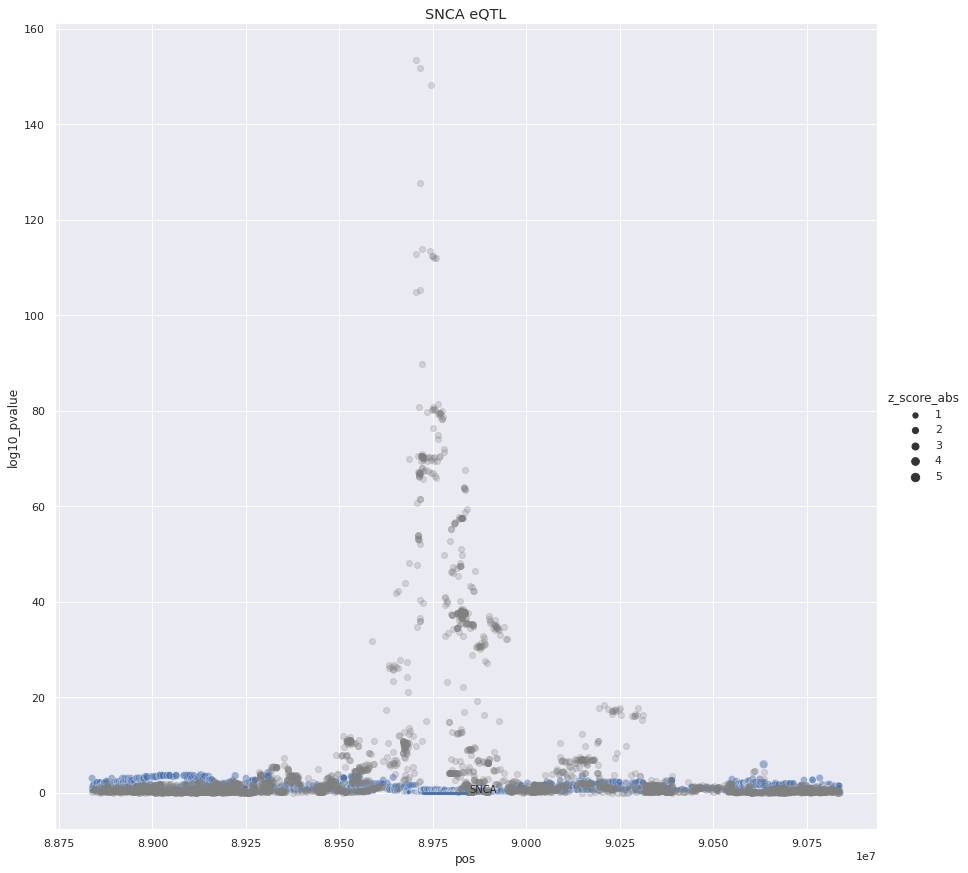

chr4
(5795553, 21)
(4032, 21)
DGKQ ENSG00000145214.13
gene DGKQ is on chr4 from 958887 to 986895
(4032, 21)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


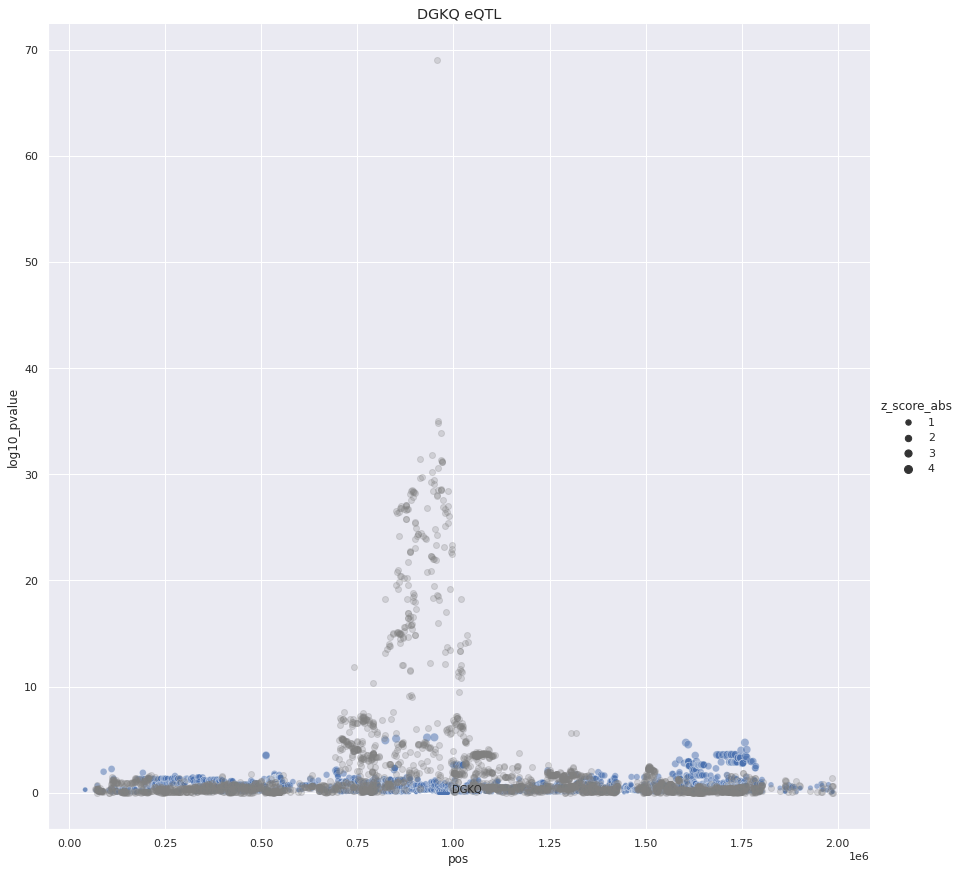

chr9
(5180707, 21)
(3308, 21)
PHF24 ENSG00000122733.12
gene PHF24 is on chr9 from 34957608 to 34982544
(3308, 21)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


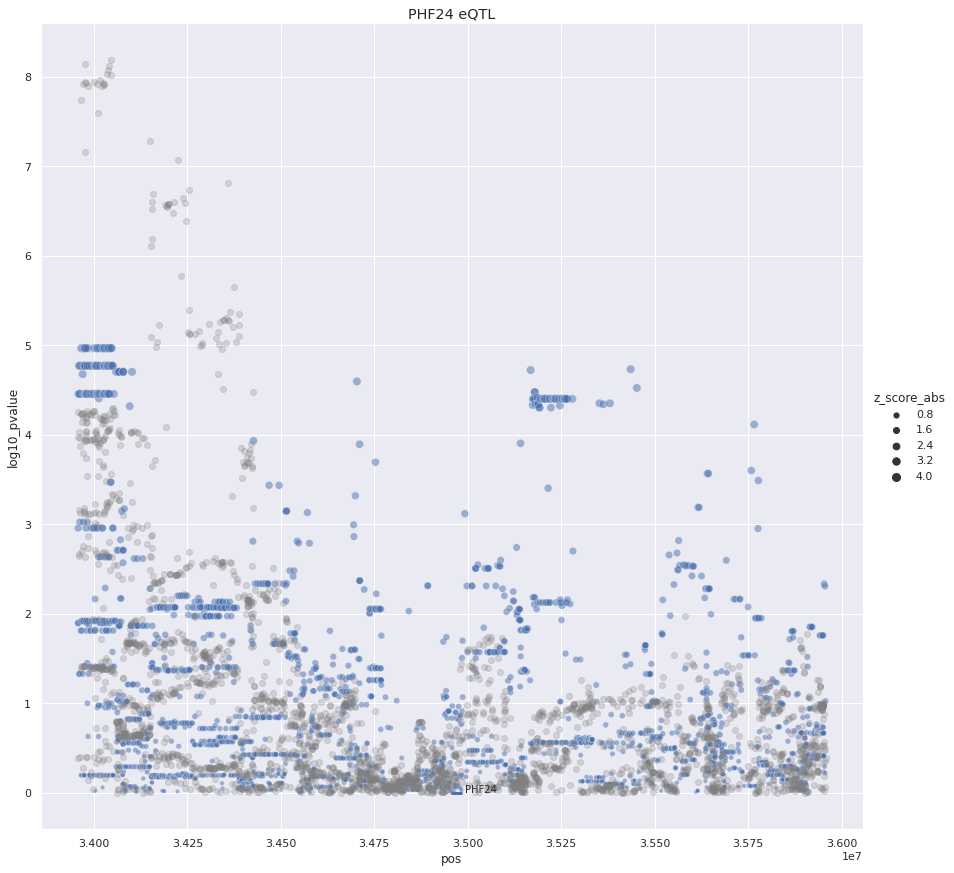

CPU times: user 46.9 s, sys: 10.8 s, total: 57.7 s
Wall time: 45.4 s


In [50]:
%%time

for gene_id in gene_ids:
    gene_df = genes_oi_df.loc[genes_oi_df['gene_id'] == gene_id]
    print(gene_df['seqname'].unique()[0])
    chrom = gene_df['seqname'].unique()[0]
    gene_name = gene_df['gene_name'].unique()[0]
    gene_start = gene_df['start'].min()
    gene_stop = gene_df['end'].max()
    # now load the chromosome eqtl results and extract specific gene results
    chrom_eqtl_df = pd.read_parquet(f'{tensorqtl_dir}/{cohort_build}.{cell_type}.cis_qtl_pairs.{chrom}.parquet')
    chrom_bim_df = pd.read_csv(f'{genos_dir}/{cohort_version}.{chrom}.bfile.bim', 
                               header=None, sep='\s+')
    chrom_bim_df.columns = ['chr', 'name', 'cm', 'pos', 'a1', 'a2']
    chrom_eqtl_df = chrom_eqtl_df.merge(chrom_bim_df, how='inner', 
                                    left_on='variant_id', right_on='name')    
    print(chrom_eqtl_df.shape)
    gene_eqtl_df = chrom_eqtl_df.loc[chrom_eqtl_df['phenotype_id'] == gene_id]
    print(gene_eqtl_df.shape)
    # get gwas stats for region
    min_bp = gene_eqtl_df['pos'].min()
    max_bp = gene_eqtl_df['pos'].max()
#     region_gwas_df = gwas_stats_df.loc[(gwas_stats_df['chr'] == chrom) 
#                                        & (gwas_stats_df['position'] > min_bp) 
#                                        & (gwas_stats_df['position'] < max_bp)]
    region_gwas_df = gwas_stats_df.loc[gwas_stats_df['SNP'].isin(gene_eqtl_df['variant_id'])]
    plot_eqtl_manhattan(gene_id, gene_name, chrom, gene_start, gene_stop, 
                        gene_eqtl_df, region_gwas_df)